# Exercício 5

Inicialmente, vamos definir o grafo que representa as conexões entre cada personagem do livro.

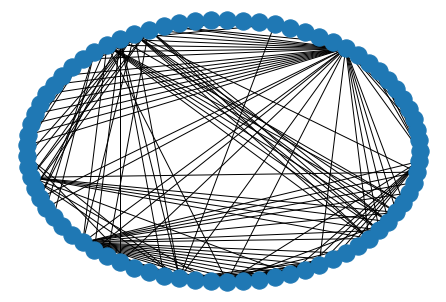

In [142]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as r

g= nx.read_gml("lesmis.gml") # Read the network
g = g.to_undirected() #Remove a direcao dos links

npos=nx.circular_layout(g)
nx.draw(g,pos = npos, with_labels=False, arrows=False)
plt.show()

### Implementação PageRank

Primeiramente vamos definir e mostrar a respectiva matriz de transição do grafo.

In [144]:
T = nx.to_numpy_matrix(g)
print(T)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Agora vamos aplicar o ajuste estocástico na matriz T e já transformar ela uma matriz de probabilidade de transição, a aplicação do ajuste estocástico é necessário pois para o algoritmo pagerank funcionar é necessário uma cadeia ergódica.

In [9]:
N = T.shape[0]
P = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if(np.sum(T[i,:]) > 0):
            P[i,j] = T[i,j]/np.sum(T[i,:])
        else:
            P[i,j] = 1/N
print(P)

[[0.         0.1        0.1        ... 0.         0.         0.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]
 [0.33333333 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Agora podemos fazer o ajuste ergódico para obter a matriz G (ou matriz de Google).

In [10]:
G = np.zeros((N,N))
alpha = 0.85
for i in range(0,N):
    for j in range(0,N):
        G[i,j] = alpha*P[i,j] + (1-alpha)/N
print(G)

[[0.00194805 0.08694805 0.08694805 ... 0.00194805 0.00194805 0.00194805]
 [0.85194805 0.00194805 0.00194805 ... 0.00194805 0.00194805 0.00194805]
 [0.28528139 0.00194805 0.00194805 ... 0.00194805 0.00194805 0.00194805]
 ...
 [0.00194805 0.00194805 0.00194805 ... 0.00194805 0.00194805 0.00194805]
 [0.00194805 0.00194805 0.00194805 ... 0.00194805 0.00194805 0.00194805]
 [0.00194805 0.00194805 0.00194805 ... 0.00194805 0.00194805 0.00194805]]


Finalmente com a matriz G, para obter PageRank, é necessário obter a matriz estacionária de G, ou simplesmente obter os autovetores referente ao autovalor 1.

In [124]:
eigvals, eigvecs = np.linalg.eig(G.T)
eigvec1 = eigvecs[:,np.isclose(eigvals, 1)]
eigvec1 = eigvec1[:,0]

stationary = eigvec1 / eigvec1.sum()

stationary = stationary.real

Com a classificação de cada nó do PageRank em mãos, vamos fazer várias caminhadas aleatórias, começando uma de cada nó, dando 1000 passos aleatórios e vamos ir somando as frequências de visitas em cada vetor, para poder comparar com o PageRank. Após a contagem das frequências vamos dividir pelo valor total de visitas em todos os nós para chegar em uma distribuição estacionária estimada.

### Implementação Caminhada Aleatória

Para implementação das caminhadas aleatórias, primeiramente vamos definir um dicionário contendo todos os nomes dos personagens, cada inicialmente com o valor 0, que será somado em 1 cada vez que a caminhada passar pelo seu respectivo nó na caminhada aleatória.
Depois pegamos todos esses valores e dividimos pela soma do total das frequência, assim obtemos valores entre 0 e 1 para poder comparar com o PageRank.

In [151]:
freq = {}
for i in list(g):
    temp = {i: 0}
    freq.update(temp)

steps = 1000

for i in list(g):
    atual = i
    for j in range(1,steps):
        atual= r.choice(list(g.neighbors(atual)))
        freq[atual] = freq[atual] + 1

freq_est = np.array(list(freq.values()))
freq_est = freq_est/sum(freq_est)

### Comparação

Agora que temos os scores do algoritimo PageRank e os valores das frequências referente as caminhadas aleatórias, vamos mostrar para cada nome de personagem o seu valor referente em cada método.

In [152]:
for i in range(0,N):
    print(list(g)[i], ': PG:', stationary[i], 'RW:', freq_est[i])

Myriel : PG: 0.04277928102271197 RW: 0.02154102154102154
Napoleon : PG: 0.005584290834982474 RW: 0.00208000208000208
MlleBaptistine : PG: 0.010277134629737873 RW: 0.005668005668005668
MmeMagloire : PG: 0.010277134629737816 RW: 0.005876005876005876
CountessDeLo : PG: 0.005584290834982454 RW: 0.002444002444002444
Geborand : PG: 0.005584290834982457 RW: 0.002457002457002457
Champtercier : PG: 0.005584290834982466 RW: 0.002054002054002054
Cravatte : PG: 0.005584290834982466 RW: 0.002262002262002262
Count : PG: 0.005584290834982466 RW: 0.001885001885001885
OldMan : PG: 0.005584290834982466 RW: 0.002379002379002379
Labarre : PG: 0.0037290409310482635 RW: 0.002145002145002145
Valjean : PG: 0.07543012163278477 RW: 0.07107107107107107
Marguerite : PG: 0.005260327543023245 RW: 0.003991003991003991
MmeDeR : PG: 0.0037290409310482635 RW: 0.001768001768001768
Isabeau : PG: 0.0037290409310482635 RW: 0.001807001807001807
Gervais : PG: 0.0037290409310482635 RW: 0.002197002197002197
Tholomyes : PG: 0.0

Agora com os valores PageRank e os valores resultantes da caminhada aleatória para cada nó, vamos plotar o grafo novamente, com o tamanho de cada nó influenciado pelo seu respectivo score, começando pelo PageRank.

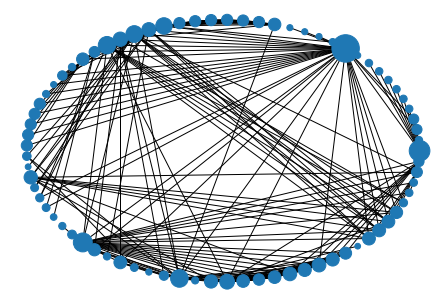

In [153]:
npos=nx.circular_layout(g,scale=1)

nx.draw(g,pos = npos, with_labels=False, node_size = stationary*10000, arrows=False)
plt.draw()
plt.show()

Agora caminhada aleatória.

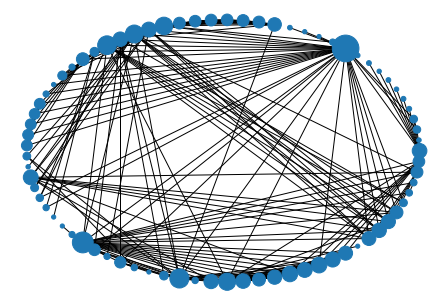

In [154]:
nx.draw(g,pos = npos, with_labels=False, node_size = freq_est*10000, arrows=False)
plt.draw()
plt.show()

Como podemos perceber, os grafos ficaram parecidos, com o tamanho dos nós quase iguais, então para confirmar, agora vamos comparar os valores do PageRank e os valores da caminhada aleatória fazendo um gráfico de dispersão.

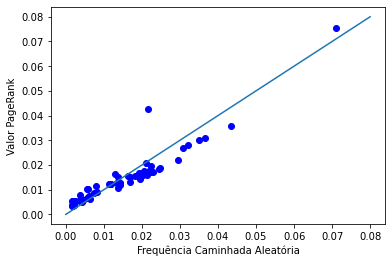

In [156]:
plt.plot(freq_est,stationary,'bo')
plt.plot([0,0.08],[0,0.08])
plt.xlabel('Frequência Caminhada Aleatória')
plt.ylabel('Valor PageRank')
plt.show()

Como podemos ver os valores são bem parecidos e possuem correlação bem forte.